In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Load dataset**



In [2]:

data = pd.read_excel("/content/EDA 1 HEART DATA new.xlsx")
print(data.shape)
print(data.head())


(1025, 14)
   age     sex  cp  trestbps  chol  fbs  restecg  thalach exang  oldpeak  \
0   52    Male   0       125   212    0        1      168    No      1.0   
1   53    Male   0       140   203    1        0      155   yes      3.1   
2   70    Male   0       145   174    0        1      125   yes      2.6   
3   61    Male   0       148   203    0        1      161    No      0.0   
4   62  Female   0       138   294    1        1      106    No      1.9   

   slope  ca          thal target  
0      2   2    Reversible     No  
1      0   0    Reversible     No  
2      0   0    Reversible     No  
3      2   1    Reversible     No  
4      1   3  Fixed defect     No  


Average age of patients

In [3]:
data['age'].mean()


np.float64(54.43414634146342)

Gender distribution

In [4]:
data['sex'].value_counts()


,count
sex,
Male,713
Female,312


Average resting blood preesure

In [5]:
data['trestbps'].mean()


np.float64(131.61170731707318)

High fasting blood sugar count

In [6]:
data['fbs'].sum()


np.int64(153)

Types of chest pain

In [7]:
data['cp'].unique()


array([0, 1, 2, 3])

Correlation between age and cholesterol

In [8]:
data[['age', 'chol']].corr()


,age,chol
age,1.000000,0.219823
chol,0.219823,1.000000


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['chol'].plot(kind='hist', bins=20, title='chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='age', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['chol']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('chol', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('chol')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['chol']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'chol'}, axis=1)
              .sort_values('chol', ascending=True))
  xs = counted['chol']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('chol', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('chol')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['chol'].plot(kind='line', figsize=(8, 4), title='chol')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='age', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='chol', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Chest pain type by age

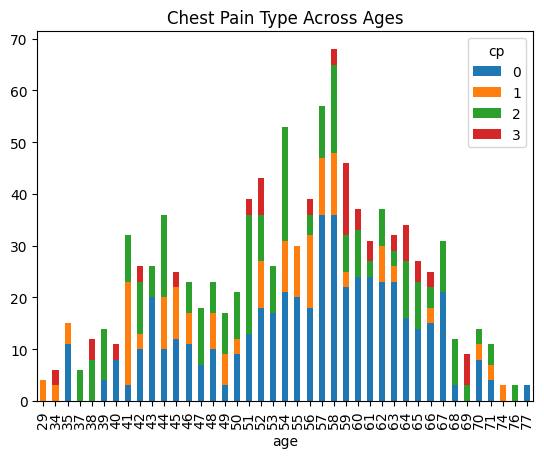

In [9]:
data.groupby('age')['cp'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Chest Pain Type Across Ages')
plt.show()


Max heart rate vs exercise-induced angina

In [10]:
data.groupby('exang')['thalach'].mean()


,thalach
exang,
No,155.342647
yes,136.837681


Blood sugar vs heart disease presence

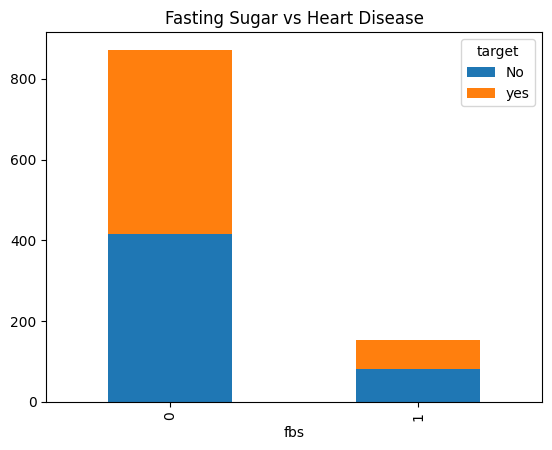

In [11]:
pd.crosstab(data['fbs'], data['target']).plot(kind='bar', stacked=True)
plt.title('Fasting Sugar vs Heart Disease')
plt.show()


Correlation between Age and Cholesterol

           age      chol
age   1.000000  0.219823
chol  0.219823  1.000000


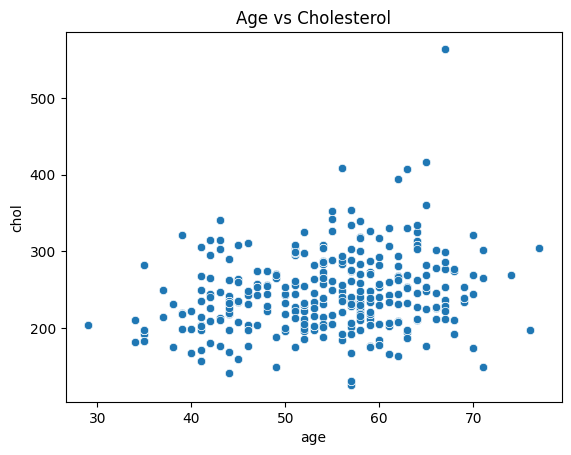

In [12]:
# Correlation between age and cholesterol
corr = data[['age', 'chol']].corr()
print(corr)

sns.scatterplot(x='age', y='chol', data=data)
plt.title('Age vs Cholesterol')
plt.show()


Distribution of Chest Pain (cp) Types Across Age Groups

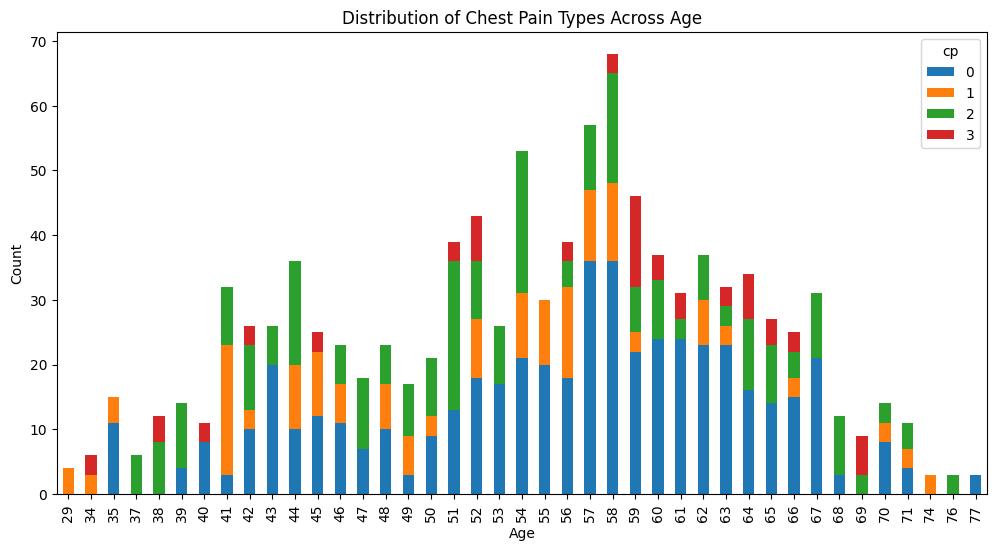

In [14]:
data.groupby('age')['cp'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution of Chest Pain Types Across Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Maximum Heart Rate (thalach) vs Exercise-Induced Angina (exang)

exang
No     155.342647
yes    136.837681
Name: thalach, dtype: float64


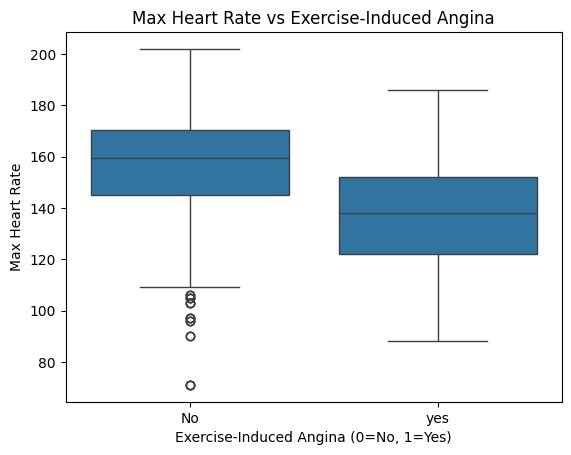

In [15]:
print(data.groupby('exang')['thalach'].mean())

sns.boxplot(x='exang', y='thalach', data=data)
plt.title('Max Heart Rate vs Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina (0=No, 1=Yes)')
plt.ylabel('Max Heart Rate')
plt.show()


. Difference in Resting BP (trestbps) Between Male & Female

sex
Female    133.701923
Male      130.697055
Name: trestbps, dtype: float64


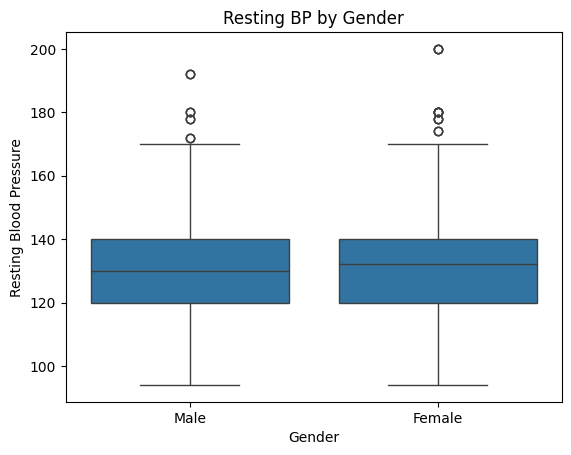

In [16]:
print(data.groupby('sex')['trestbps'].mean())

sns.boxplot(x='sex', y='trestbps', data=data)
plt.title('Resting BP by Gender')
plt.xlabel('Gender')
plt.ylabel('Resting Blood Pressure')
plt.show()


Relationship Between Fasting Blood Sugar (fbs) and Heart Disease

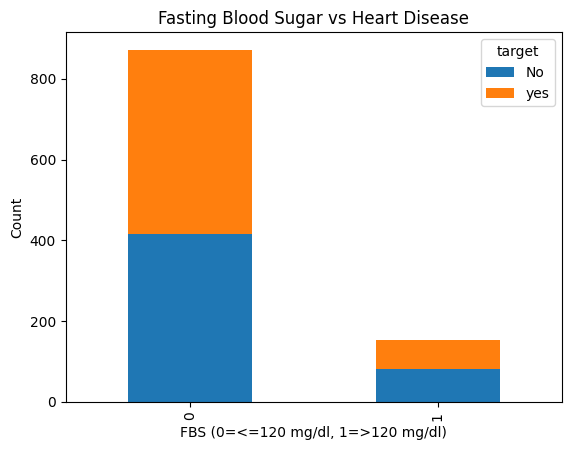

In [17]:
pd.crosstab(data['fbs'], data['target']).plot(kind='bar', stacked=True)
plt.title('Fasting Blood Sugar vs Heart Disease')
plt.xlabel('FBS (0=<=120 mg/dl, 1=>120 mg/dl)')
plt.ylabel('Count')
plt.show()


Effect of Number of Major Vessels (ca) on Heart Disease

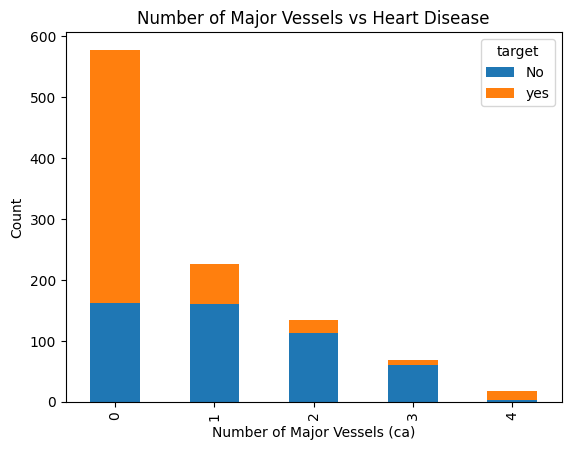

In [18]:
pd.crosstab(data['ca'], data['target']).plot(kind='bar', stacked=True)
plt.title('Number of Major Vessels vs Heart Disease')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Count')
plt.show()


 Average Oldpeak for Different Chest Pain Types

cp
0    1.438833
1    0.323952
2    0.784507
3    1.380519
Name: oldpeak, dtype: float64


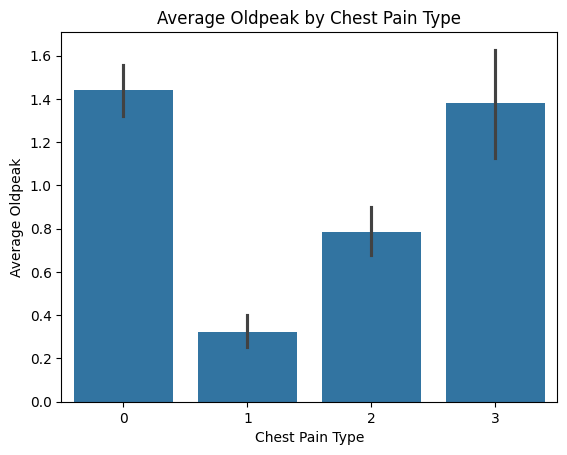

In [19]:
print(data.groupby('cp')['oldpeak'].mean())

sns.barplot(x='cp', y='oldpeak', data=data)
plt.title('Average Oldpeak by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Average Oldpeak')
plt.show()


Distribution of Thalassemia (thal) Among Heart Disease Patients

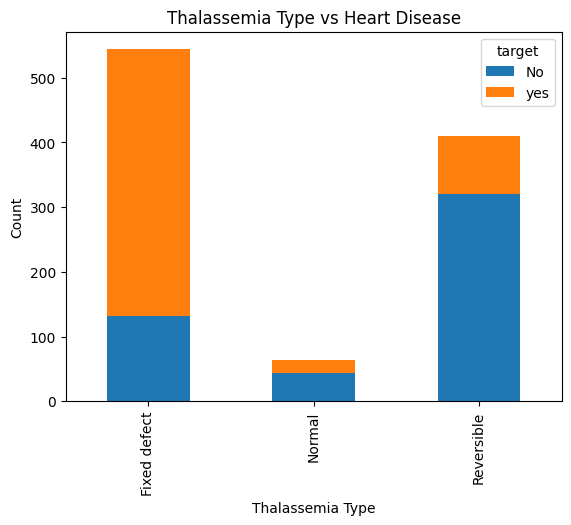

In [20]:
pd.crosstab(data['thal'], data['target']).plot(kind='bar', stacked=True)
plt.title('Thalassemia Type vs Heart Disease')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.show()


Common Risk Factor Combinations in Heart Disease Patients

In [21]:
common = (
    data[data['target'] == 1]
    .groupby(['cp', 'fbs', 'exang', 'thal'])
    .size()
    .reset_index(name='counts')
    .sort_values(by='counts', ascending=False)
)
print(common.head(10))


Empty DataFrame
Columns: [cp, fbs, exang, thal, counts]
Index: []


Describe Heart vs No Heart disease patients

In [25]:
heart_patients = data[data['target'] == 1]
no_heart_patients = data[data['target'] == 0]

print("Heart Disease Patients:\n", heart_patients.describe())
print("\nNo Heart Disease Patients:\n", no_heart_patients.describe())


Heart Disease Patients:
        age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
count  0.0  0.0  0.0       0.0   0.0  0.0      0.0      0.0    0.0      0.0   
mean   NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
std    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
min    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
25%    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
50%    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
75%    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
max    NaN  NaN  NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   

       slope   ca  target  
count    0.0  0.0     0.0  
mean     NaN  NaN     NaN  
std      NaN  NaN     NaN  
min      NaN  NaN     NaN  
25%      NaN  NaN     NaN  
50%      NaN  NaN     NaN  
75%      NaN  NaN     NaN  
max      NaN  NaN     NaN  

No Heart D

Effect of Combining Multiple Risk Factors

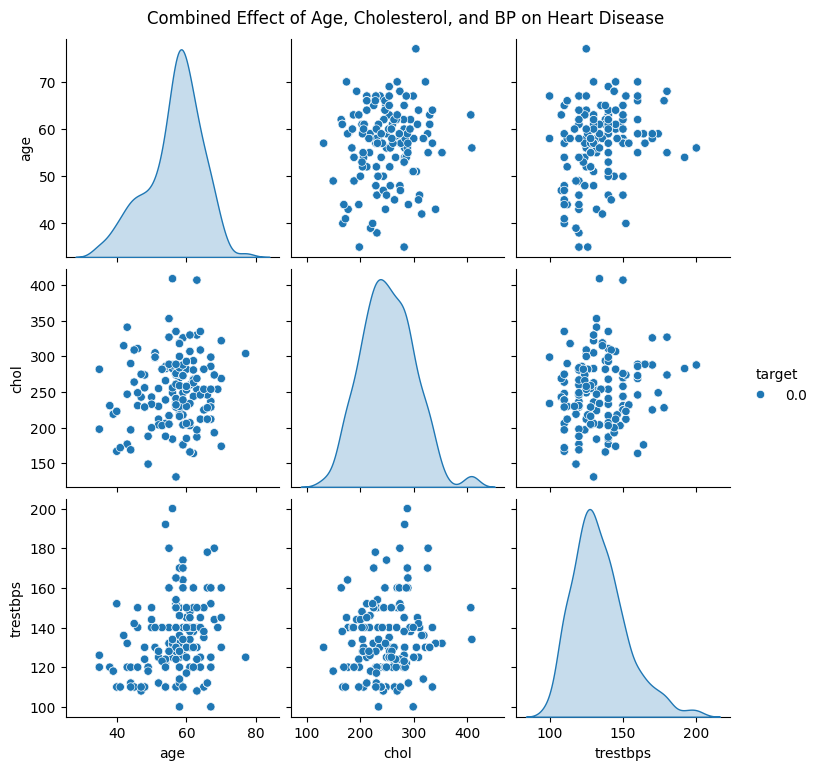

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='target', vars=['age', 'chol', 'trestbps'])
plt.suptitle("Combined Effect of Age, Cholesterol, and BP on Heart Disease", y=1.02)
plt.show()


Analyze survival rates by thal type

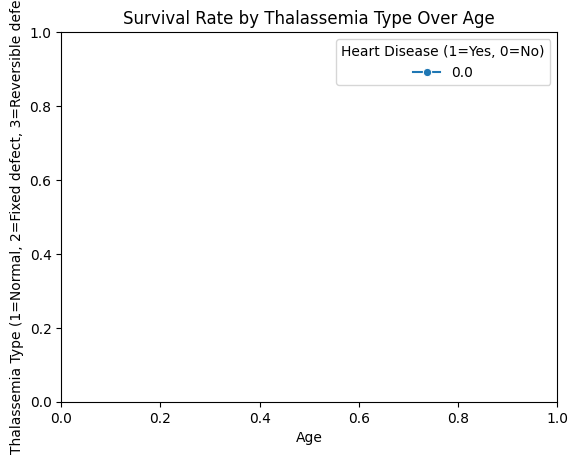

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot to analyze relationship between thal type, age, and survival (target)
sns.lineplot(x='age', y='thal', hue='target', data=data, marker='o')

plt.title('Survival Rate by Thalassemia Type Over Age')
plt.xlabel('Age')
plt.ylabel('Thalassemia Type (1=Normal, 2=Fixed defect, 3=Reversible defect)')
plt.legend(title='Heart Disease (1=Yes, 0=No)')
plt.show()


Final Summary

Heart disease risk rises with age, high BP, high cholesterol, diabetes, and defective thalassemia.
Combining these risk factors gives the best prediction — prevention and early detection are key to saving lives.
